# Setup

In [411]:
import subprocess
import sys

def install_and_import(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

packages = [
    "os", "base64", "requests", "json", "pandas", "python-dotenv", "numpy",
    "seaborn", "scikit-learn", "matplotlib", "xgboost"
]

for package in packages:
    install_and_import(package)

import os
import base64
from requests import post, get
import json
import pandas as pd
from dotenv import load_dotenv
import numpy as np
from functools import cache
import time

import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# import sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [412]:
load_dotenv()
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")
print(client_id)

c4401408414c49a59e72223bad40229e


In [413]:
client_id="e19f868c40394ceeb90e778daf20f9c7"
client_secret="6be8e17dfbe347f0976fbdf00f500bc9"

In [414]:

def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data={
        "grant_type": "client_credentials",
        "client_id": client_id,
        "client_secret": client_secret,
    }

    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    return json_result['access_token']

def get_auth_header(token):
    return {
        "Authorization": "Bearer " + token,
    }


In [415]:
token = get_token()
header = get_auth_header(token)
print(token)


BQCdRxzzxhU9EzTboAbbbTkhxG5glEV62K1iHsd9LpBIj73WRlAFSfrRS4ZS_aZzIMpRKmWgDDnd7owQUnkO0_gaqTyvZLQlPn4us7BgkiLCz3R2ins


## ALBUM

In [416]:
def get_album(album_id, market=None):
    """
    Get Spotify catalog information for a single album.

    Parameters:
    - album_id (str): The Spotify ID of the album.
    - market (str, optional): An ISO 3166-1 alpha-2 country code.

    Returns:
    - dict: JSON response containing the album's information.
    """
    url = f"https://api.spotify.com/v1/albums/{album_id}"
    headers = header
    params = {}

    if market:
        params["market"] = market

    response = get(url, headers=headers, params=params)
    return response.json()

def get_several_albums(album_ids, market=None):
    """
    Get Spotify catalog information for multiple albums identified by their Spotify IDs.

    Parameters:
    - album_ids (list): A list of Spotify IDs for the albums. Maximum: 20 IDs.
    - market (str, optional): An ISO 3166-1 alpha-2 country code.

    Returns:
    - dict: JSON response containing the albums' information.
    """
    url = "https://api.spotify.com/v1/albums"
    headers = header
    params = {
        "ids": ",".join(album_ids)
    }

    if market:
        params["market"] = market

    response = get(url, headers=headers, params=params)
    return response.json()

def get_album_tracks(album_id, market=None, limit=20, offset=0):
    """
    Get Spotify catalog information about an album’s tracks.

    Parameters:
    - album_id (str): The Spotify ID of the album.
    - market (str, optional): An ISO 3166-1 alpha-2 country code.
    - limit (int, optional): The maximum number of items to return. Default is 20. Range is 1 to 50.
    - offset (int, optional): The index of the first item to return. Default is 0.

    Returns:
    - dict: JSON response containing the album's tracks information.
    """
    url = f"https://api.spotify.com/v1/albums/{album_id}/tracks"
    headers = header
    params = {
        "limit": limit,
        "offset": offset
    }

    if market:
        params["market"] = market

    response = get(url, headers=headers, params=params)
    return response.json()

## ARTIST

In [417]:
def get_artist(artist_id):
    """
    Get Spotify catalog information for a single artist.

    Parameters:
    - artist_id (str): The Spotify ID of the artist.

    Returns:
    - dict: JSON response containing the artist's information.
    """
    url = f"https://api.spotify.com/v1/artists/{artist_id}"
    headers = header

    response = get(url, headers=headers)
    return response.json()

def get_several_artists(artist_ids):
    """
    Get Spotify catalog information for several artists based on their Spotify IDs.

    Parameters:
    - artist_ids (list): A list of Spotify IDs for the artists. Maximum: 50 IDs.

    Returns:
    - dict: JSON response containing the artists' information.
    """
    url = "https://api.spotify.com/v1/artists"
    headers = header
    params = {
        "ids": ",".join(artist_ids)
    }

    response = get(url, headers=headers, params=params)
    return response.json()

def get_artist_albums(artist_id, include_groups=None, market=None, limit=20, offset=0):
    """
    Get Spotify catalog information about an artist's albums.

    Parameters:
    - artist_id (str): The Spotify ID of the artist.
    - include_groups (str, optional): A comma-separated list of keywords to filter the response. Valid values are "album", "single", "appears_on", "compilation".
    - market (str, optional): An ISO 3166-1 alpha-2 country code.
    - limit (int, optional): The maximum number of items to return. Default is 20. Range is 1 to 50.
    - offset (int, optional): The index of the first item to return. Default is 0.

    Returns:
    - dict: JSON response containing the artist's albums information.
    """
    url = f"https://api.spotify.com/v1/artists/{artist_id}/albums"
    headers = header
    params = {
        "limit": limit,
        "offset": offset
    }

    if include_groups:
        params["include_groups"] = include_groups
    if market:
        params["market"] = market

    response = get(url, headers=headers, params=params)
    return response.json()

def get_artist_top_tracks(artist_id, market=None):
    """
    Get Spotify catalog information about an artist's top tracks by country.

    Parameters:
    - artist_id (str): The Spotify ID of the artist.
    - market (str, optional): An ISO 3166-1 alpha-2 country code.

    Returns:
    - dict: JSON response containing the artist's top tracks information.
    """
    url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
    headers = header
    params = {}

    if market:
        params["market"] = market

    response = get(url, headers=headers, params=params)
    return response.json()

def get_related_artists(artist_id):
    """
    Get Spotify catalog information about artists similar to a given artist.

    Parameters:
    - artist_id (str): The Spotify ID of the artist.

    Returns:
    - dict: JSON response containing the related artists' information.
    """
    url = f"https://api.spotify.com/v1/artists/{artist_id}/related-artists"
    headers = header

    response = get(url, headers=headers)
    return response.json()

## CATEGORIES

In [418]:
def get_categories(locale=None, limit=20, offset=0):
    """
    Get a list of categories used to tag items in Spotify (on, for example, the Spotify player’s “Browse” tab).

    Parameters:
    - locale (str, optional): The desired language, consisting of an ISO 639-1 language code and an ISO 3166-1 alpha-2 country code, joined by an underscore.
    - limit (int, optional): The maximum number of items to return. Default is 20. Minimum is 1. Maximum is 50.
    - offset (int, optional): The index of the first item to return. Default is 0.

    Returns:
    - dict: JSON response containing the categories information.
    """
    url = "https://api.spotify.com/v1/browse/categories"
    headers = header
    params = {
        "limit": limit,
        "offset": offset
    }

    if locale:
        params["locale"] = locale

    response = get(url, headers=headers, params=params)
    return response.json()

def get_single_browse_category(category_id, locale=None):
    """
    Get a single category used to tag items in Spotify.

    Parameters:
    - category_id (str): The Spotify category ID for the category.
    - locale (str, optional): The desired language, consisting of an ISO 639-1 language code and an ISO 3166-1 alpha-2 country code, joined by an underscore.

    Returns:
    - dict: JSON response containing the category's information.
    """
    url = f"https://api.spotify.com/v1/browse/categories/{category_id}"
    headers = header
    params = {}

    if locale:
        params["locale"] = locale

    response = get(url, headers=headers, params=params)
    return response.json()

## PLAYLIST

In [419]:
def get_playlist(playlist_id, market=None, fields=None, additional_types=None):
    """
    Get a playlist owned by a Spotify user.

    Parameters:
    - playlist_id (str): The Spotify ID of the playlist.
    - market (str, optional): An ISO 3166-1 alpha-2 country code.
    - fields (str, optional): Filters for the query.
    - additional_types (str, optional): A comma-separated list of item types that your client supports besides the default track type.

    Returns:
    - dict: JSON response containing the playlist's information.
    """
    url = f"https://api.spotify.com/v1/playlists/{playlist_id}"
    headers = header
    params = {}

    if market:
        params["market"] = market
    if fields:
        params["fields"] = fields
    if additional_types:
        params["additional_types"] = additional_types

    response = get(url, headers=headers, params=params)
    return response.json()

def get_playlist_items(playlist_id, market=None, fields=None, limit=20, offset=0, additional_types=None):
    """
    Get full details of the items of a playlist owned by a Spotify user.

    Parameters:
    - playlist_id (str): The Spotify ID of the playlist.
    - market (str, optional): An ISO 3166-1 alpha-2 country code.
    - fields (str, optional): Filters for the query.
    - limit (int, optional): The maximum number of items to return. Default is 20. Range is 1 to 50.
    - offset (int, optional): The index of the first item to return. Default is 0.
    - additional_types (str, optional): A comma-separated list of item types that your client supports besides the default track type.

    Returns:
    - dict: JSON response containing the playlist items' information.
    """
    url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"
    headers = header
    params = {
        "limit": limit,
        "offset": offset
    }

    if market:
        params["market"] = market
    if fields:
        params["fields"] = fields
    if additional_types:
        params["additional_types"] = additional_types

    response = get(url, headers=headers, params=params)
    return response.json()

def get_featured_playlists(locale=None, limit=20, offset=0):
    """
    Get a list of Spotify featured playlists.

    Parameters:
    - locale (str, optional): The desired language, consisting of an ISO 639-1 language code and an ISO 3166-1 alpha-2 country code, joined by an underscore.
    - limit (int, optional): The maximum number of items to return. Default is 20. Minimum is 1. Maximum is 50.
    - offset (int, optional): The index of the first item to return. Default is 0.

    Returns:
    - dict: JSON response containing the featured playlists information.
    """
    url = "https://api.spotify.com/v1/browse/featured-playlists"
    headers = header
    params = {
        "limit": limit,
        "offset": offset
    }

    if locale:
        params["locale"] = locale

    response = get(url, headers=headers, params=params)
    return response.json()

def get_category_playlists(category_id, limit=20, offset=0):
    """
    Get a list of Spotify playlists tagged with a particular category.

    Parameters:
    - category_id (str): The Spotify category ID for the category.
    - limit (int, optional): The maximum number of items to return. Default is 20. Minimum is 1. Maximum is 50.
    - offset (int, optional): The index of the first item to return. Default is 0.

    Returns:
    - dict: JSON response containing the playlists information.
    """
    url = f"https://api.spotify.com/v1/browse/categories/{category_id}/playlists"
    headers = header
    params = {
        "limit": limit,
        "offset": offset
    }

    response = get(url, headers=headers, params=params)
    return response.json()

## SEARCH

In [420]:
def search_spotify_items(q, types, market=None, limit=20, offset=0, include_external=None):
    """
    Search for Spotify catalog information about albums, artists, playlists, tracks, shows, episodes, or audiobooks.

    Parameters:
    - q (str): The search query.
    - types (list): A list of item types to search across. Allowed values: "album", "artist", "playlist", "track", "show", "episode", "audiobook".
    - market (str, optional): An ISO 3166-1 alpha-2 country code.
    - limit (int, optional): The maximum number of results to return in each item type. Default is 20. Range is 0 - 50.
    - offset (int, optional): The index of the first result to return. Default is 0. Range is 0 - 1000.
    - include_external (str, optional): If "audio", includes externally hosted audio content as playable.

    Returns:
    - dict: JSON response containing the search results.
    """
    base_url = "https://api.spotify.com/v1/search"
    headers = header
    params = {
        "q": q,
        "type": ",".join(types),
        "limit": limit,
        "offset": offset
    }

    if market:
        params["market"] = market
    if include_external:
        params["include_external"] = include_external

    response = get(base_url, headers=headers, params=params)
    return response.json()

## TRACKS


In [421]:
def get_several_tracks_info(ids, market=None):
    """
    Get detailed Spotify catalog information for multiple tracks based on their Spotify IDs.

    Parameters:
    - ids (list of str): List of Spotify track IDs. Maximum is 50 IDs.
    - market (str, optional): An ISO 3166-1 alpha-2 country code. Only content available in this market will be returned.

    Returns:
    - dict: JSON response containing track information.
    """
    if len(ids) > 100:
        raise ValueError("The maximum number of track IDs is 50.")

    url = "https://api.spotify.com/v1/tracks"
    headers = header
    params = {
        "ids": ",".join(ids)
    }
    if market:
        params["market"] = market

    response = get(url, headers=headers, params=params)
    return response.json()




def get_several_tracks_audio_features(ids):
    """
    Get audio features for multiple tracks based on their Spotify IDs.

    Parameters:
    - ids (list of str): List of Spotify track IDs. Maximum is 100 IDs.

    Returns:
    - dict: JSON response containing the audio features information.
    """
    if len(ids) > 100:
        raise ValueError("The maximum number of track IDs is 100.")

    url = "https://api.spotify.com/v1/audio-features"
    headers = header
    params = {
        "ids": ",".join(ids)
    }

    response = get(url, headers=headers, params=params)
    return response.json()



# Trabalho

### DEFININDO GENEROS

In [422]:
categories = {
    "names": [],
    "ids": []
}

categories_data = get_categories( limit=50, offset=0)['categories']['items']
names = np.array([category['name'] for category in categories_data])
ids = np.array([category['id'] for category in categories_data])

# Efficiently assign lists without a loop
categories["names"] = names.tolist()
categories["ids"] = ids.tolist()
categories

{'names': ['Made For You',
  'New Releases',
  'Marília Mendonça',
  'Brazil',
  'Sertanejo',
  'Pop',
  'Charts',
  'Brazilian Funk',
  'In the car',
  'Hip-Hop',
  'Samba & Pagode',
  'Discover',
  'MPB',
  'AMPLIFIKA',
  'Dance/Electronic',
  'Christian & Gospel',
  'Rock',
  'Indie',
  'RADAR',
  'GLOW',
  'EQUAL',
  'Mood',
  'Workout',
  'Chill',
  'Party',
  'At Home',
  'Sleep',
  'Love',
  'Cooking & Dining',
  'Wellness',
  'Focus',
  'Trending',
  'Decades',
  'Spotify Singles',
  'Cities',
  'Travel',
  'Nature & Noise',
  'Latin',
  'R&B',
  'K-pop',
  'Songwriters',
  'Music + Talk',
  'Fresh Finds',
  'Kids & Family',
  'TV & Movies',
  'Gaming',
  'Anime',
  'Tastemakers',
  'Netflix',
  'Student'],
 'ids': ['0JQ5DAt0tbjZptfcdMSKl3',
  '0JQ5DAqbMKFz6FAsUtgAab',
  '0JQ5DAqbMKFNN285FvRwOf',
  '0JQ5DAqbMKFKGQWi5egawY',
  '0JQ5DAqbMKFJCTDO6ndZMP',
  '0JQ5DAqbMKFEC4WFtoNRpw',
  '0JQ5DAudkNjCgYMM0TZXDw',
  '0JQ5DAqbMKFCkm2Enfbj7Y',
  '0JQ5DAqbMKFIRybaNTYXXy',
  '0JQ5DAqbMKFQ0

In [423]:
filter_categories = ["Pop","Sertanejo","Hip-Hop","Dance/Électro", "Rock","Latino", "RnB"]

In [424]:

categories_df = pd.DataFrame(categories)
#categories_df = categories_df[categories_df['names'].isin(filter_categories)]
#categories_df = categories_df.reset_index(drop=True)
categories_df

,names,ids
0,Made For You,0JQ5DAt0tbjZptfcdMSKl3
1,New Releases,0JQ5DAqbMKFz6FAsUtgAab
2,Marília Mendonça,0JQ5DAqbMKFNN285FvRwOf
3,Brazil,0JQ5DAqbMKFKGQWi5egawY
4,Sertanejo,0JQ5DAqbMKFJCTDO6ndZMP
5,Pop,0JQ5DAqbMKFEC4WFtoNRpw
6,Charts,0JQ5DAudkNjCgYMM0TZXDw
7,Brazilian Funk,0JQ5DAqbMKFCkm2Enfbj7Y
8,In the car,0JQ5DAqbMKFIRybaNTYXXy
9,Hip-Hop,0JQ5DAqbMKFQ00XGBls6ym


### Buscando playlist


In [425]:
playlists = {
    "ids": [],
    "messages": [],
}

# Obter playlists e mensagens para cada categoria
playlists_data = [get_category_playlists(item, limit=50, offset=0) for item in categories_df['ids']]

# Extrair ids e mensagens
for track_collection in playlists_data:
    items = track_collection['playlists']['items']
    message = track_collection['message']
    for item in items:
        playlists["ids"].append(item['id'])
        playlists["messages"].append(message)



In [426]:
playlists_df=pd.DataFrame(playlists)
playlists_df

,ids,messages
0,37i9dQZF1DX34KNiFQJNVm,New Releases
1,37i9dQZF1DXc5EXfkDXlmk,Marília Mendonça
2,37i9dQZF1EFHLV2noe5gSo,Marília Mendonça
3,37i9dQZF1DXbqGyNSQ96BN,Marília Mendonça
4,37i9dQZF1DX4yBwHEPjkuo,Marília Mendonça
...,...,...
1630,37i9dQZF1DXd2wJvXxyJb8,Student
1631,37i9dQZF1DWTf69iQOGkD2,Student
1632,37i9dQZF1DX0H97kz3DdJ6,Student
1633,37i9dQZF1DWWr5uieiPUVM,Student


In [427]:
playlists_ids = playlists_df['ids'].tolist()
len(playlists_ids)

1635

## Spotpy


In [428]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import re

In [429]:
# leaving these public because there's no need to make env-vars
cid = "e19f868c40394ceeb90e778daf20f9c7"
secret = "6be8e17dfbe347f0976fbdf00f500bc9"

In [430]:
# Authentication - without user
client_credentials_manager = SpotifyClientCredentials(
    client_id=client_id, client_secret=client_secret
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
import concurrent.futures
#TODO: fazer essa parte na mao
def get_track_uris(playlist_id):
    tracks = sp.playlist_tracks(playlist_id)["items"]
    return [x["track"]["uri"] for x in tracks if x["track"]]

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(get_track_uris, playlists_ids))


HTTP Error for GET to https://api.spotify.com/v1/playlists/37i9dQZF1EZT8cSzhJA9lL/tracks with Params: {'limit': 100, 'offset': 0, 'fields': None, 'market': None, 'additional_types': 'track'} returned 400 due to Bad request


SpotifyException: http status: 400, code:-1 - https://api.spotify.com/v1/playlists/37i9dQZF1EZT8cSzhJA9lL/tracks?limit=100&offset=0&additional_types=track:
 Bad request, reason: None

In [ ]:
token = get_token()
header = get_auth_header(token)

In [ ]:
playlists_df

,ids,messages
0,37i9dQZF1DXdSjVZQzv2tl,Sertanejo
1,37i9dQZF1DX5lAV5ZGu9ik,Sertanejo
2,37i9dQZF1DXc5EXfkDXlmk,Sertanejo
3,37i9dQZF1DX3R59Eoqqsy8,Sertanejo
4,37i9dQZF1DXcC14V9ZdJ9I,Sertanejo
...,...,...
133,37i9dQZF1DWTUHzPOW6Jl7,R&B
134,37i9dQZF1DX4SBhb3fqCJd,R&B
135,37i9dQZF1DX6EQe4DjJNfI,R&B
136,37i9dQZF1DXbFiKKs5CKio,R&B


In [ ]:
track_ids_df=pd.DataFrame(results)
#remove spotify:track:
track_ids_df = track_ids_df.replace(to_replace=r'spotify:track:', value='', regex=True)

In [ ]:
#add messages to the dataframe in the first column
track_ids_df.insert(0, "message", playlists_df['messages'])
track_ids_df

,message,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,Sertanejo,5rHhO6SBSzo3E9m3KHyCtt,7pkpWcko6KEZANj0xKsCsu,1wubETHu3SeJHfbz9itEH0,7l9Tq5phzkLnhWUyfp702G,7f1tZNtc1t456ybBsl5sfK,3EJfFRgtbIYzBQdlc6PO9V,5sKGmZDmkGwFed5dPpZpZL,3JLhwgadVkN8zckxL1ICrI,0KDxhAvKeiVFL1bZccQVJs,...,None,None,None,None,None,None,None,None,None,None
1,Sertanejo,5EQQcQUoF1D2phHXV10Eq6,5rHhO6SBSzo3E9m3KHyCtt,7yD1kE5drOxjemNWdUrKNZ,08C7nkUFIk8BxtKxx8opXd,1wubETHu3SeJHfbz9itEH0,2Li8tWQBprZEjyDVQaSpTC,0BvzY9PCRufFPt51fvnhOI,6o5CBptHCsb4pyQV9l3TBU,7FdGeazienHpcYz9KYAuWW,...,None,None,None,None,None,None,None,None,None,None
2,Sertanejo,53PpijFATt35Zxfl6LTxoK,3GmJxfnUDrIs1iCfKUELFz,4AAIAVjSyiq1N7SXKkwXZe,4qsOrxBv09HhNSpsgMRXdC,38MpAndIjGAyVdcC6npX95,3tc8Z4lGzOIwmIVftsxO6o,4YhPcVIxIAJrLhFVPGbJkE,4UANYptjv2kpV6IY7IjXoJ,4SjkLzyFBVXaxuB6SbJyJN,...,None,None,None,None,None,None,None,None,None,None
3,Sertanejo,2fUELMuWTWZ0uAKud5nX2l,0BbTQBwcBhT00GbAv5UQ2R,7nFsuyRlLkIQEuRRTFb6zB,3ZoMHf4MvXA16kINwIa3C1,6NioqVBfrtXcmzQUxHxqGf,2Li8tWQBprZEjyDVQaSpTC,3JLhwgadVkN8zckxL1ICrI,0cmW66v6mOdc2yK6ioeBT5,5EmlbSncQN8QYgFK84Hr6Y,...,None,None,None,None,None,None,None,None,None,None
4,Sertanejo,3tc8Z4lGzOIwmIVftsxO6o,51pxwIxDVCbFHW8oyJFQXD,3laDGpbCmdrGOhjrcYIBYB,2dmGj5Nf01FcR6N4HPzAbL,6lK3nCiigk34SGqEjpQoqO,2gl2F5Z6ReNVh0wcyPLCKA,4AAIAVjSyiq1N7SXKkwXZe,6qDvzHbstT1Tr45okT8eN4,7ug4WpEEENdaGKoi5ZPLA7,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,R&B,5Ssv6DaKrW0HczVqx6zXdl,0KKkJNfGyhkQ5aFogxQAPU,1zi7xx7UVEFkmKfv06H8x0,5aIVCx5tnk0ntmdiinnYvw,5rb9QrpfcKFHM1EUbSIurX,6Uj1ctrBOjOas8xZXGqKk4,49FYlytm3dAAraYgpoJZux,22VdIZQfgXJea34mQxlt81,6b8Be6ljOzmkOmFslEb23P,...,3Ey11v2aiX14s4wBaYbhlp,0276oT52BTy2zKrTQyYPQt,5u3FywQOPJ5O7ZAjm31cnq,3sckKKIx96cjPXtiqPHCTB,2rGAASBrTG770g8wx5NJOV,6Z0yKCHpLXoDVqFSlWh9OM,0IGjUHYbwnK6Bo8u79d2E3,6dp3XPQJuC7qP7TaEFVgL5,3sfydNh0QQAdnIAtDVG16H,4hTFbz1G3He7e3MKqXjcGx
134,R&B,0BDlu6AEeWxdjmKwFc0rI0,1WwrfoGe0K33z1tVI6mevJ,2oVVaVY0LkzwAYYcyzon6Z,7tr8SXmP9j0uVqUU0qoapb,2nYeyMeqYDiFSYYtl2BWD6,6bAhP5wDZy04YjQ1NTcyO5,0uYBQGchK3LIkNpxnrA6k7,6NCtzHANN8GwvxdrSzJBB9,0quwQM9YgpwBsNnCyZ8aaA,...,None,None,None,None,None,None,None,None,None,None
135,R&B,4elZOvjR7KDUEw8rMz2tAT,3DAlIobCDPVvUkyDZv5oVp,7exzjXAlIdaZN72iALsc5W,1r5xSeHHrnnAPlZD8s03N1,1LCSQQmH7VK2Orq5eBDPcL,41q6MCZsyUh9WZqWn4TtXp,3IEPthVo5Q9p81McMpEGRV,32RZ9zfGC4gvkkIm307Fpb,2pWh0qXT9466a6HwMf9I1W,...,None,None,None,None,None,None,None,None,None,None
136,R&B,3XIiRlcc1bKUegBbJ17iVp,66nRZPGdQWXZhTSfvpIFDS,7dhlm4m0UScJjJi9IWTAsT,7exzjXAlIdaZN72iALsc5W,5PaQRXicaR5efjg0Pl8Ev9,47oHb5kfI2EycPbyT4oR7Y,1GqQ1T7yMUYZgwguy7fwvi,3EBUi6ngDPHnhtjsQAuPua,3WKoJ3XpkwOLyR1MROs59k,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
def preencher_e_limpar_ids(df):
    # Inicializa uma lista para armazenar as linhas preenchidas
    filled_rows = []
    
    # Itera por cada categoria única no DataFrame
    for categoria in df['message'].unique():
        # Seleciona todas as linhas que correspondem à categoria atual
        categoria_df = df[df['message'] == categoria]
        ids_acumulados = []
        ids_unicos = set()  # Usado para evitar duplicatas
        
        # Acumula IDs não None e únicos para a categoria
        for i in range(len(categoria_df)):
            for x in categoria_df.iloc[i, 1:]:
                if pd.notna(x) and x not in ids_unicos:
                    ids_acumulados.append(x)
                    ids_unicos.add(x)
        
        # Divide os IDs acumulados em blocos de até 100 IDs e cria uma linha para cada bloco
        for start in range(0, len(ids_acumulados), 100):
            filled_row = [categoria] + ids_acumulados[start:start + 100] + [None] * (100 - len(ids_acumulados[start:start + 100]))
            filled_rows.append(filled_row)

    # Define as colunas do DataFrame e reconstrói com a coluna 'message'
    df_filled = pd.DataFrame(filled_rows, columns=['message'] + list(range(100)))
    
    # Retorna o DataFrame final
    return df_filled

# Exemplo de uso
track_ids_df_test = pd.DataFrame({
    "message": ["Sertanejo", "Sertanejo", "Sertanejo", "Rock", "Rock"],
    0: ["a", "e", "j", "k", "11"],
    1: ["b", "f", None, "l", "12"],
    2: ["d", None, None, "m", "13"],
    3: [None, None, None, "n", None]
})

track_ids_df_filled_test = preencher_e_limpar_ids(track_ids_df_test)
track_ids_df_filled_test



,message,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,Sertanejo,a,b,d,e,f,j,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Rock,k,l,m,n,11,12,13,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
track_ids_df_filled = preencher_e_limpar_ids(track_ids_df)

In [ ]:
len(track_ids_df_filled['message'].unique())==len(track_ids_df['message'].unique())

True

In [ ]:
with_none=[len(track_ids_df_filled)-1]
for i in range(len(track_ids_df_filled) - 1):
    if len(track_ids_df_filled.iloc[i].value_counts()) != 101:
        with_none.append(i)
        if track_ids_df_filled['message'][i] == track_ids_df_filled['message'][i + 1]:
            print("Erro na linha", i)
with_none

[70, 9, 21, 33, 45, 56]

In [ ]:
# Agrupa do 1 ao 100 em uma lista
track_ids_df_filled['track_ids'] = track_ids_df_filled.iloc[:, 1:].values.tolist()

# Remove as colunas que foram adicionadas na lista
track_ids_df_filled = track_ids_df_filled.iloc[:, [0, -1]]

track_ids_df_filled

,message,track_ids
0,Sertanejo,"[5rHhO6SBSzo3E9m3KHyCtt, 7pkpWcko6KEZANj0xKsCs..."
1,Sertanejo,"[38MpAndIjGAyVdcC6npX95, 3tc8Z4lGzOIwmIVftsxO6..."
2,Sertanejo,"[3gisEEogzZW8SPs0exvD4D, 2CjfZFik0UQpymdog4vdj..."
3,Sertanejo,"[2P7cdwIoEMAl3qavXponC2, 0He5PQBBA10GH88c73vqk..."
4,Sertanejo,"[2nfnhFDhwMet9yZodpGfn3, 0WrM1ON5poAsmKw3x5uPh..."
...,...,...
66,R&B,"[0A3aV8YiLBoHkxyHgkCVBl, 0UVNwFoQioR960YIHd5f2..."
67,R&B,"[18JosZY3HzD3lMy6iOOSAY, 3QS9ZCtoSCJhmaJ7QNXSA..."
68,R&B,"[01Aj44KIjCrPmZeXq4UOky, 5bJ796cOnGBzSN5bm4mwM..."
69,R&B,"[0M3zo2dGoxG1hMzOWlJQ8U, 7AvJrRBbe7U4eis5ifjf7..."


In [ ]:
def locate_and_remove_none(track_id):
    track_id = [x for x in track_id if x is not None]
    return track_id

In [ ]:
track_ids_df_filled.loc[with_none, 'track_ids'] = track_ids_df_filled.loc[with_none, 'track_ids'].apply(locate_and_remove_none)

In [ ]:
for i in with_none:
    if len(track_ids_df_filled['track_ids'][with_none[0]])<100:
        pass
    else:
        print("Erro na linha", i)

In [ ]:

track_ids = track_ids_df_filled['track_ids'][0]
print(len(track_ids),"[" + ",".join(track_ids) + "]")

100 [5rHhO6SBSzo3E9m3KHyCtt,7pkpWcko6KEZANj0xKsCsu,1wubETHu3SeJHfbz9itEH0,7l9Tq5phzkLnhWUyfp702G,7f1tZNtc1t456ybBsl5sfK,3EJfFRgtbIYzBQdlc6PO9V,5sKGmZDmkGwFed5dPpZpZL,3JLhwgadVkN8zckxL1ICrI,0KDxhAvKeiVFL1bZccQVJs,3Na9gwLmFdEJH2l54AYwpk,2KdyhL41F9solmRiyLQ3yl,3Bkw2nrO4vXwql6BBDH5pq,6ukVCqH77f6cwRHyJBhGgy,2ThEetsRrVOEoCNpoFVDjM,7CutNxjzAKbs7EhBAlnRJt,0BvzY9PCRufFPt51fvnhOI,4dvHZesL5UKzfJnFH5bm3g,0ikHh6vrN2RcCANXwRnMHx,2WEhFQZBJqgY3MBTxK9r10,1NcqLEg2r2LXqMVbam2BJD,3whfTX0NBHhjynUlARMf7q,2lhTndwmmoMqMq8SSDfwbU,38MiIYlhGASln9jXnOmX04,1tAls12jSoUZPoj9cv7OAh,5qMyN3dzXKb5P1MiKyqupZ,0GbvYZsvz7bWyijBDESebX,1cIS13bqNfZcTs8LSK8r0a,6u9tu5yRDTHpWlY86J1GDa,6mTpK40yIRk1xGGNvRMHGg,1Ms6NNsLMqdC5v1qE3d89p,4A59ygOlOd3V0GbyEmUxKs,5QpcLTQjh0qO7OIuR9q8IR,0WiJIa3V9GdcJfcy1FhLjp,1WHDOr19zyyqu6XXIvdgfX,6X6jKoyw1OjogRghMEQAZV,5cdheFwwvj4mi3oJmTynKA,2DtHi3V76ntRw1RIKgYMfe,0pK0Vd1MCWy7AmsyFfIJb8,2ORC76autQ7QTfBCkZl4Wo,0HDMisLsuGNml98Xq7atpm,1VbunACv3Z4cGfBenC7oTx,18Ap6Yh17R9Qrs7LdOvkW2,6hNREzgHbVM5AkGwP4SPmU,0aGBJD

In [ ]:
track_ids_df_filled['track_ids'][0][:3]

['5rHhO6SBSzo3E9m3KHyCtt', '7pkpWcko6KEZANj0xKsCsu', '1wubETHu3SeJHfbz9itEH0']

In [ ]:
track_features_response=get_several_tracks_info(track_ids_df_filled['track_ids'][0][:3])
track_features_response

{'tracks': [{'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3hq7WoPJsrRP0KMSLhUgRz'},
      'href': 'https://api.spotify.com/v1/artists/3hq7WoPJsrRP0KMSLhUgRz',
      'id': '3hq7WoPJsrRP0KMSLhUgRz',
      'name': 'Murilo Huff',
      'type': 'artist',
      'uri': 'spotify:artist:3hq7WoPJsrRP0KMSLhUgRz'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/2CKOmarVWvWqkNWUatHCex'},
      'href': 'https://api.spotify.com/v1/artists/2CKOmarVWvWqkNWUatHCex',
      'id': '2CKOmarVWvWqkNWUatHCex',
      'name': 'Ana Castela',
      'type': 'artist',
      'uri': 'spotify:artist:2CKOmarVWvWqkNWUatHCex'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
    

In [ ]:

track_features = {
    "danceability": [],
    "energy": [],
    "key": [],
    "loudness": [],
    "mode": [],
    "speechiness": [],
    "acousticness": [],
    "instrumentalness": [],
    "liveness": [],
    "valence": [],
    "tempo": [],

    #"id": [],
    #"uri": [],
    #"track_href": [],
    #"analysis_url": [],

    "duration_ms": [],
    "time_signature": [],
    "category": []
}
for i in range(len(track_ids_df_filled)):
    features = get_several_tracks_audio_features(track_ids_df_filled['track_ids'][i])
    for track in features['audio_features']:
        track_features["danceability"].append(track["danceability"])
        track_features["energy"].append(track["energy"])
        track_features["key"].append(track["key"])
        track_features["loudness"].append(track["loudness"])
        track_features["mode"].append(track["mode"])
        track_features["speechiness"].append(track["speechiness"])
        track_features["acousticness"].append(track["acousticness"])
        track_features["instrumentalness"].append(track["instrumentalness"])
        track_features["liveness"].append(track["liveness"])
        track_features["valence"].append(track["valence"])
        track_features["tempo"].append(track["tempo"])

        #track_features["id"].append(track["id"])
        #track_features["uri"].append(track["uri"])
        #track_features["track_href"].append(track["track_href"])
        #track_features["analysis_url"].append(track["analysis_url"])

        track_features["duration_ms"].append(track["duration_ms"])
        track_features["time_signature"].append(track["time_signature"]) 
        track_features["category"].append(track_ids_df_filled['message'][i])
    

In [ ]:
df_track_features = pd.DataFrame(track_features)
df=df_track_features
df_track_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,category
0,0.669,0.877,5,-2.768,1,0.0663,0.218,0.0,0.166,0.755,152.049,169591,4,Sertanejo
1,0.633,0.815,2,-3.943,1,0.1110,0.484,0.0,0.431,0.642,97.555,165301,4,Sertanejo
2,0.443,0.700,6,-5.196,1,0.0422,0.605,0.0,0.634,0.572,153.383,150449,4,Sertanejo
3,0.790,0.849,9,-3.608,1,0.0410,0.341,0.0,0.356,0.800,118.074,144665,4,Sertanejo
4,0.727,0.837,8,-4.139,1,0.1180,0.451,0.0,0.463,0.866,137.983,149323,4,Sertanejo


In [ ]:
# check the number of observations in each cluster
df.category.value_counts()

category
R&B          1322
Rock         1184
Hip-Hop      1145
Pop          1132
Latin        1028
Sertanejo     940
Name: count, dtype: int64

### Training

In [ ]:
# define feature variable
X = df.drop("category", axis=1)
X.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6200,0.625,0.322,9,-11.499,1,0.0932,0.721000,0.000040,0.1060,0.591,79.593,168054,4
2628,0.741,0.634,0,-7.481,1,0.1220,0.194000,0.000007,0.2760,0.776,135.071,176426,4
3545,0.529,0.977,11,-3.651,1,0.0561,0.000846,0.011000,0.0777,0.695,151.999,201187,4
5957,0.747,0.518,7,-8.657,1,0.1090,0.247000,0.005920,0.0992,0.548,85.510,145965,4
5054,0.826,0.717,2,-1.427,1,0.0733,0.095100,0.000157,0.1870,0.813,95.003,126016,4


In [ ]:
y = np.array(df["category"])
y

array(['Sertanejo', 'Sertanejo', 'Sertanejo', ..., 'R&B', 'R&B', 'R&B'],
      dtype=object)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

### 1. Logistic Regression - Baseline Model

In [ ]:
pipeline_lr = Pipeline(
    [
        ("scalar1", StandardScaler()),
        ("lr_clf", LogisticRegression(solver='saga',random_state=0,multi_class='multinomial',max_iter=1000,tol=10e-3)),
    ]
)

In [ ]:
# evaluate performance on validation data
pipeline_lr.fit(X_train, y_train)
# make prediction on validation data
y_val_pred = pipeline_lr.predict(X_val)
# check first 20 ground truths and prediction
print('Actual label:    ', y_val[:10])
print('Predicted label: ', y_val_pred[:10])

Actual label:     ['R&B' 'Rock' 'Pop' 'Latin' 'Rock' 'Hip-Hop' 'Rock' 'Pop' 'Pop' 'Hip-Hop']
Predicted label:  ['Hip-Hop' 'Sertanejo' 'Pop' 'Pop' 'Rock' 'Latin' 'R&B' 'Rock' 'Hip-Hop'
 'Hip-Hop']


/home/kali/git/chorano_e_dancando/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# module for classification report
from sklearn.metrics import classification_report
# print out classification report
target_names = df['category'].unique()
report_1 = classification_report(y_val, y_val_pred, target_names=target_names,output_dict=True)
df_r_logistic = pd.DataFrame(report_1).transpose()
df_r_logistic.head(7)


,precision,recall,f1-score,support
Sertanejo,0.564444,0.505976,0.533613,251.000000
Pop,0.404651,0.418269,0.411348,208.000000
Hip-Hop,0.256410,0.172414,0.206186,232.000000
Rock,0.472527,0.526531,0.498069,245.000000
Latin,0.585366,0.714894,0.643678,235.000000
R&B,0.548718,0.594444,0.570667,180.000000
accuracy,0.487047,0.487047,0.487047,0.487047


<Figure size 2000x1200 with 0 Axes>

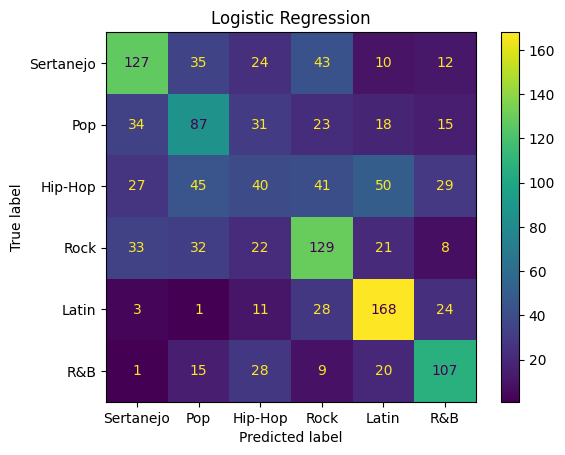

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)

# plot confusion matrix of logistic regression
plt.figure(figsize=(20,12))
cm = confusion_matrix(y_val, y_val_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title("Logistic Regression")
plt.show()

In [ ]:
# AUC
y_val_proba = pipeline_lr.predict_proba(X_val)

# roc auc score using one versus rest and macro average
LR_auc = roc_auc_score(y_val, y_val_proba, multi_class='ovr', average='macro')
f"The average AUC for the logistic regression model is {LR_auc:0.3f}"

'The average AUC for the logistic regression model is 0.802'

In [ ]:
target_names


array(['Sertanejo', 'Pop', 'Hip-Hop', 'Rock', 'Latin', 'R&B'],
      dtype=object)

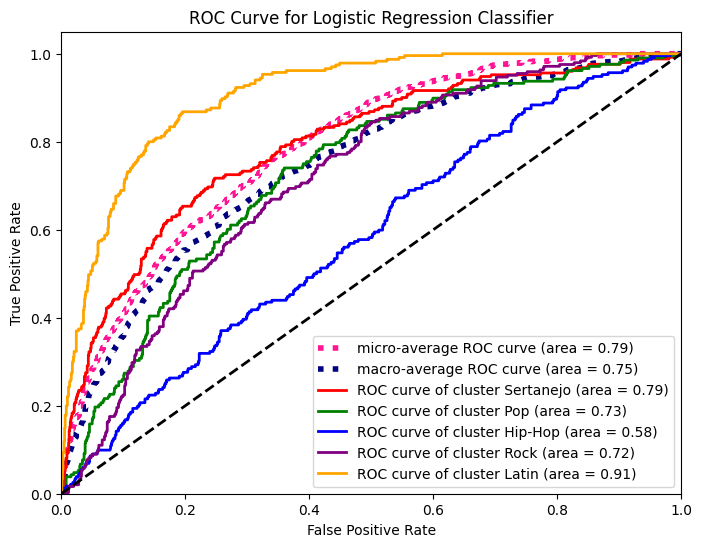

In [ ]:
# Plot ROC Curves for Logistic Regression
from sklearn.preprocessing import label_binarize
from itertools import cycle
# Ensure the classes used in label_binarize match the unique classes in y_val
classes = np.unique(y_val)
y_val_bin = label_binarize(y_val, classes=classes)

n_classes = 5
lw=2

y_score = pipeline_lr.decision_function(X_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

# Change the colors here
colors = cycle(["red", "green", "blue", "purple", "orange"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(target_names[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Classifier")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# f1 score
from sklearn.metrics import f1_score
LR_f1 = f1_score(y_val, y_val_pred, average='macro')
f"The baseline F1(macro) socre of the logistic regression model on the validation data is {LR_f1:0.3f}"

'The baseline F1(macro) socre of the logistic regression model on the validation data is 0.477'

### 2. Random Forest

In [ ]:
rf_clf = RandomForestClassifier(random_state=0)

In [ ]:
rf_clf.fit(X_train, y_train)
# make prediction on validation data
y_val_pred = rf_clf.predict(X_val)
# check first 20 ground truths and prediction
print('Actual label:    ', y_val[:20])
print('Predicted label: ', y_val_pred[:20])

Actual label:     ['R&B' 'Rock' 'Pop' 'Latin' 'Rock' 'Hip-Hop' 'Rock' 'Pop' 'Pop' 'Hip-Hop'
 'R&B' 'Sertanejo' 'Pop' 'Hip-Hop' 'Rock' 'Rock' 'Rock' 'Rock' 'Pop'
 'Rock']
Predicted label:  ['Hip-Hop' 'Sertanejo' 'Pop' 'Sertanejo' 'Rock' 'Hip-Hop' 'R&B' 'Pop'
 'Hip-Hop' 'Hip-Hop' 'R&B' 'Sertanejo' 'R&B' 'Hip-Hop' 'Pop' 'Rock' 'Rock'
 'Rock' 'Pop' 'Pop']


In [ ]:
report_2 = classification_report(y_val, y_val_pred, target_names=target_names,output_dict=True)
df_r_rf = pd.DataFrame(report_2).transpose()
df_r_rf.head()

,precision,recall,f1-score,support
Sertanejo,0.590909,0.569721,0.580122,251.0
Pop,0.500000,0.399038,0.443850,208.0
Hip-Hop,0.378531,0.288793,0.327628,232.0
Rock,0.465517,0.551020,0.504673,245.0
Latin,0.632143,0.753191,0.687379,235.0


<Figure size 2000x1200 with 0 Axes>

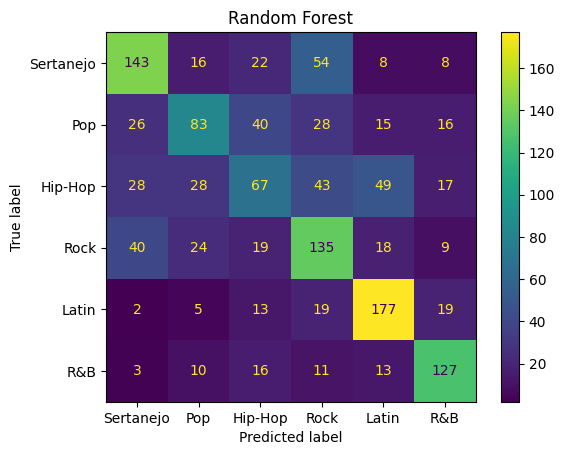

In [ ]:
# plot confusion matrix of random forest model
plt.figure(figsize=(20,12))
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title("Random Forest")
plt.show()

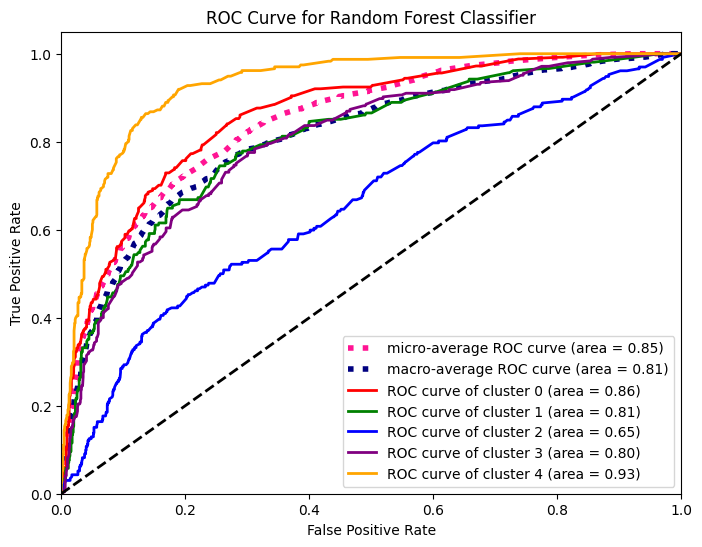

In [ ]:
# Plot ROC for Random Forest Classifier
y_score = rf_clf.predict_proba(X_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["red", "green", "blue", "purple", "orange"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [ ]:
RF_f1 = f1_score(y_val, y_val_pred, average='macro')
f"The F1(macro) socre of the random forest model on the validation data is {RF_f1:0.3f}"

'The F1(macro) socre of the random forest model on the validation data is 0.537'

### XGBoost

In [ ]:
xg_clf = XGBClassifier(booster='gbtree', use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Fit the model
xg_clf.fit(X_train, y_train_encoded)

# Make prediction on validation data
y_val_pred_encoded = xg_clf.predict(X_val)

# Decode the predicted labels back to original labels
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)

# Check first 20 ground truths and prediction
print('Actual label:    ', y_val[:10])
print('Predicted label: ', y_val_pred[:10])

/home/kali/git/chorano_e_dancando/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:15:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Actual label:     ['R&B' 'Rock' 'Pop' 'Latin' 'Rock' 'Hip-Hop' 'Rock' 'Pop' 'Pop' 'Hip-Hop']
Predicted label:  ['Hip-Hop' 'Sertanejo' 'Pop' 'Pop' 'Rock' 'Hip-Hop' 'R&B' 'Pop' 'Hip-Hop'
 'Hip-Hop']


In [ ]:
report_3 = classification_report(y_val, y_val_pred, target_names=target_names,output_dict=True)
df_r_xgb = pd.DataFrame(report_3).transpose()
df_r_xgb.head()

,precision,recall,f1-score,support
Sertanejo,0.589520,0.537849,0.562500,251.0
Pop,0.508380,0.437500,0.470284,208.0
Hip-Hop,0.324074,0.301724,0.312500,232.0
Rock,0.454545,0.510204,0.480769,245.0
Latin,0.642857,0.727660,0.682635,235.0


<Figure size 2000x1200 with 0 Axes>

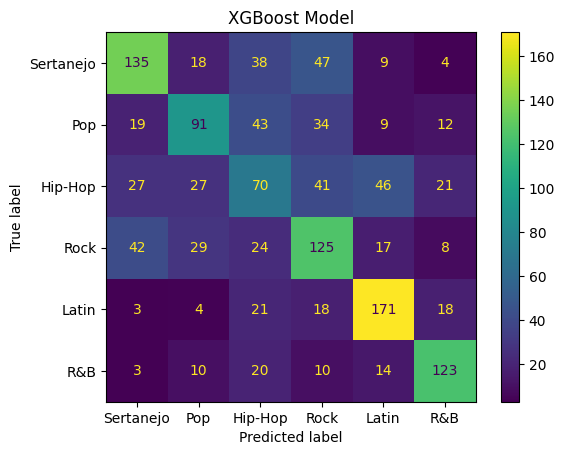

In [ ]:
# plot confusion matrix of XGBoost model
plt.figure(figsize=(20,12))
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title("XGBoost Model")
plt.show()

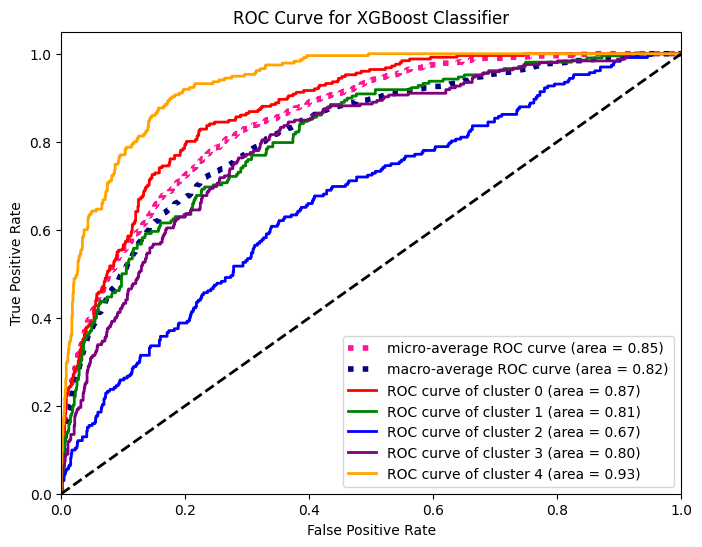

In [ ]:
# Plot ROC for Random Forest Classifier
y_score = xg_clf.predict_proba(X_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["red","green","blue","purple","orange"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Classifier")
plt.legend(loc="lower right")
plt.show()

In [ ]:
XG_f1 = f1_score(y_val, y_val_pred, average='macro')
f"The F1(macro) socre of the XGBoost model on the validation data is {XG_f1:0.3f}"

'The F1(macro) socre of the XGBoost model on the validation data is 0.530'

## Conclusion

In [ ]:
#XG_f1 RF_f1 LR_f1 compare and take the best one
f1_scores = {
    "Logistic Regression": LR_f1,
    "Random Forest": RF_f1,
    "XGBoost": XG_f1
}

best_model = max(f1_scores, key=f1_scores.get)
best_f1 = f1_scores[best_model]
f"The best model is {best_model} with a F1(macro) score of {best_f1:0.3f}"


'The best model is Random Forest with a F1(macro) score of 0.537'